In [40]:
import pandas as pd

In [41]:
df = pd.read_csv('IMDB Dataset.csv')

In [42]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [43]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [44]:
df_x = df['review']
df_y = df['sentiment']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size = 0.3, random_state= 123)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=500)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [48]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [49]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer = 'RMSprop',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

In [50]:
history = model.fit(
    x_train,
    y_train,
    epochs= 12,
    batch_size = 50,
    validation_data=(x_test,y_test)
)

Epoch 1/12
700/700 [==============================] - 6s 7ms/step - loss: 0.4293 - binary_accuracy: 0.8057 - val_loss: 0.3799 - val_binary_accuracy: 0.8337
Epoch 2/12
700/700 [==============================] - 3s 4ms/step - loss: 0.3553 - binary_accuracy: 0.8455 - val_loss: 0.3755 - val_binary_accuracy: 0.8381
Epoch 3/12
700/700 [==============================] - 2s 4ms/step - loss: 0.3267 - binary_accuracy: 0.8600 - val_loss: 0.3771 - val_binary_accuracy: 0.8406
Epoch 4/12
700/700 [==============================] - 3s 4ms/step - loss: 0.2983 - binary_accuracy: 0.8776 - val_loss: 0.3824 - val_binary_accuracy: 0.8430
Epoch 5/12
700/700 [==============================] - 3s 4ms/step - loss: 0.2666 - binary_accuracy: 0.8954 - val_loss: 0.4088 - val_binary_accuracy: 0.8373
Epoch 6/12
700/700 [==============================] - 4s 6ms/step - loss: 0.2332 - binary_accuracy: 0.9099 - val_loss: 0.4373 - val_binary_accuracy: 0.8377
Epoch 7/12
700/700 [==============================] - 3s 4ms/ste

<Axes: title={'center': 'Loss curves'}, xlabel='Epochs', ylabel='loss'>

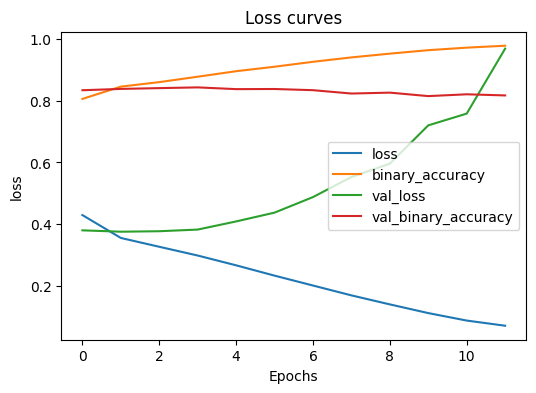

In [51]:
pd.DataFrame(history.history).plot(figsize=(6,4),xlabel="Epochs",ylabel="loss", title='Loss curves')

In [52]:
import numpy as np
y_pred = np.round(model.predict(x_test))

469/469 [==============================] - 1s 2ms/step


In [53]:
df = pd.DataFrame()
df['y_test']=y_test
df['y_pred']=y_pred
df.head()

,y_test,y_pred
11872,0,1.0
40828,1,1.0
36400,1,1.0
5166,0,0.0
30273,0,0.0


In [54]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8169333333333333